# <b><h1 style="font-size:24;">Titanic project</b></h1>

3 fichiers csv : <li>gender_submission (exemple de BDD à soumettre) </li>
                 <li>test (fichier d'entraînement/ BDD raw) </li>
                 <li>train (aussi connu as "ground truth" fichier de vérification pour l'entraînement) </li>

<b><nav>1/ Data Preprocessing</b></nav>

1.1/ Data loading

1.2/ Data cleaning

<b><nav>2/ Features</b></nav>

<b><nav>3/ Data Exploration</b></nav>

3.1 / Data Preprocessing pour le modèle

<b><nav>4/ Choix du modèle</b></nav>

## <b>1/ Data Preprocessing</b>

In [522]:
!pip install pandas
!pip install plotly
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [523]:
# Importation des bibliothèques
import pandas as pd
import plotly as pt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


### 1.1/ Data loading

In [524]:
# On import la data

test = pd.read_csv("../titanic-project/titanic_data/test.csv")
train = pd.read_csv("../titanic-project/titanic_data/train.csv")

# On regarde les colonnes et les infos du fichier train

print(train.columns)
train.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe() pour voir les statistiques des valeurs numériques

In [525]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 1.2/ Data Cleaning

Il y a des données manquantes dans Age, Cabin et Embarked.
<p>On a constaté qu'il manquait trop de données par rapport à la cabine et que ce n'est réalistiquement pas une donnée décisive, car seul le nom de la cabine ne nous donne que très peu d'informations et qu'on ne peut le corréler à aucun autre paramètre.</p>
<p>On a donc décidé de ne pas étudier ce paramètre, ni de le prendre en compte.</p>
<p>On va aussi décider de ne pas étudier ou prendre en compte le ticket, le nom des passagers et leur ID</p>
<p> On décide de remplacer l'âge par la moyenne des passagers possédant le même titre que ceux manquants.

On teste les valeurs aberrantes dans chaque colonne

In [526]:
# Contraintes : string contenant 'male' ou 'female'
if train['Sex'].isin(['male','female']) .all() == True:
    print('données vérifiées sexe')
else:
    print('non vérifiées sexe')

# Contraintes : Int égal à 1, 2 ou 3
if (train['Pclass'].isin([1,2,3])).all() == True:
    print('données vérifiées pclass')
else:
    print('non vérifiées pclass')

# Contraintes : Supérieure ou égale à 0, tous des entiers et non irréaliste
if ((train['SibSp'] >= 0).all() == True) and ((train['SibSp'] >= 0).max() < 10):
    print('données vérifiées sibSp')
else:
    print('non vérifiées sibsp')
    
# Contraintes : Supérieure ou égale à 0, tous des entiers et non irréaliste
if ((train['Parch'] >= 0).all() == True) and ((train['Parch'] >= 0).max() < 10):
    print('données vérifiées Parch')
else:
    print('non vérifiées Parch')

# On doit drop les missing values ou sinon cela fausse le résultat de l'analyse
# Contraintes : S, Q ou C
if (train['Embarked'].dropna().isin(['S','Q','C'])).all() == True:
    print('données vérifiées Embarked')
else:
    print('non vérifiées Embarked')

données vérifiées sexe
données vérifiées pclass
données vérifiées sibSp
données vérifiées Parch
données vérifiées Embarked


In [527]:
# On supprime les colonnes inutiles
train = train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Remplissage des valeurs manquantes
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

# Encodage des variables catégorielles
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
train["Sex"] = le_sex.fit_transform(train["Sex"])
train["Embarked"] = le_embarked.fit_transform(train["Embarked"])

train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## <b>2/ Features</b>

Hypothèses : 

-  Les femmes ont un taux de survie plus élevé que les hommes, en particulier entre 20 et 40 ans.

-  Les passagers de première classe ont plus de chances de survivre que ceux de troisième classe et deuxième classe.

-  Les plus jeunes ont de meilleures chance de survie, surtout chez les femmes.

-  Le prix du billet influe sur le taux de survie.

-  Le nombre de relations parents/enfants et de frères/soeurs/époux influent peut-être(?) sur le taux de survie.

-  La cabine, le port d'embarquement, le billet et le nom n'influe pas sur le taux de survie.

On ne conserverait pas Cabine, Embarked, Ticket et Name dans la BDD.

Le titre associé à la variable de Nom (Mr, Mrs, Cpt etc ...) peut nous permettre de reconstituer les âges manquants.

On aurait donc en tant que variables dans notre BDD train finale : Sex, Age, Pclass, SibSp, Parch, Fare

Il faudra donc encoder la variable Sex, et peut être normaliser les variables Age/SibSp/Parch/Fare selon les besoins du modèle.

## <b>3/ Data Exploration</b>

In [528]:
fig = px.histogram(train, 
                   x='Sex', 
                   title="Répartition par genre",
                   color='Survived')
fig.show()

In [529]:
train['age_bin'] = (train['Age'] // 10 * 10)

fig = px.histogram(train, 
                   x='age_bin', 
                   title = "Répartition par tranche d'âge",
                   color = 'Survived',
                   labels={'count':'Nombre','age_bin':'Age'})
fig.show()

In [530]:
train['fare_ticket'] = (train['Fare'] // 10 * 10)

fig = px.histogram(train, 
                   x='fare_ticket', 
                   title = "Répartition par prix du ticket", 
                   color ='Survived',
                   labels={'count':'Nombre','fare_ticket':'Prix'})
fig.show()

In [531]:
fig = px.histogram(
    train,
    x = train['Pclass'].astype(str),  # transforme 1/2/3 en "1"/"2"/"3"
    title="Répartition par classe",
    color = 'Survived',
    labels={'x': 'Classe', 'count': 'Nombre'}
)
fig.show()

In [532]:
train['fare_ticket'] = (train['Fare'] // 10)*10

fig = px.histogram(
    train,
    x = train['Pclass'].astype(str),  # transforme 1/2/3 en "1"/"2"/"3"
    title="Répartition du prix du ticket par classe",
    color = 'fare_ticket',
    labels={'x': 'Classe', 'count': 'Nombre'}
)
fig.show()

In [533]:
fig = px.histogram(train, 
                   x='Embarked', 
                   color = 'Survived',
                   title = "Répartition par port d'embarquement")
fig.show()

In [534]:
fig = px.histogram(train, x='SibSp', 
                   title = "Répartition par fratrie et époux",
                   color = 'Survived',
                   labels={'count':'Nombre','SibSp':'Nombre de frères, soeurs et époux'})
fig.show()

In [535]:
fig = px.histogram(train, x='Parch', 
                   title = "Répartition par relations Parent/Enfants", 
                   color = 'Survived',
                   labels={'count':'Nombre','Parch':'Nombre de parents et enfants'})
fig.show()

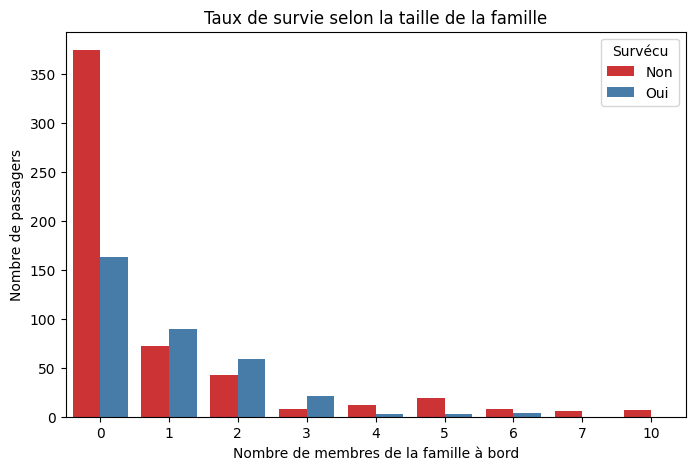

In [536]:
train["FamilySize"] = train["SibSp"] + train["Parch"]


plt.figure(figsize=(8,5))
sns.countplot(x="FamilySize", hue="Survived", data=train, palette="Set1")

plt.title("Taux de survie selon la taille de la famille")
plt.xlabel("Nombre de membres de la famille à bord")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

<p>Il y a une corrélation apparente entre le prix du ticket et la classe. On va donc uniquement utiliser la classe pour améliorer la précision du modèle.</p>
<p>On a donc identifié une corrélation entre le sexe, l'âge, la classe et le nombre de membre dans la famille.</p>

## 4/ Choix du modèle

Le type de problème que l'on veut résoudre est une classification en 2 catégories : Survivant/Mort.
<p>On veut un modèle supervisé pour lui donner nos données.</p>
<p>Classification binaire</p>
<p>Régression</p>
<p>On import les modules nécessaires des différents modèles et fonctions</p>

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

On clean les données dans train une dernière fois et on identifie la target et les features

In [538]:
train.drop(['fare_ticket','age_bin','Embarked','FamilySize'], axis='columns', inplace=True)

x = train[['Age','Sex','Pclass','SibSp','Parch','Fare']]
y = train['Survived']
print(train)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           0       3    1  22.0      1      0   7.2500
1           1       1    0  38.0      1      0  71.2833
2           1       3    0  26.0      0      0   7.9250
3           1       1    0  35.0      1      0  53.1000
4           0       3    1  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
886         0       2    1  27.0      0      0  13.0000
887         1       1    0  19.0      0      0  30.0000
888         0       3    0  28.0      1      2  23.4500
889         1       1    1  26.0      0      0  30.0000
890         0       3    1  32.0      0      0   7.7500

[891 rows x 7 columns]


On divise notre jeu de données train en 80/20 pour éviter l'overfitting (qu'il apprenne par coeur le jeu de données)

In [539]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

On entraîne notre modèle

In [540]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


On fait des prédictions et on évalue l'accuracy

In [541]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7690582959641256
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       267
           1       0.70      0.74      0.72       179

    accuracy                           0.77       446
   macro avg       0.76      0.76      0.76       446
weighted avg       0.77      0.77      0.77       446

